In [9]:
import numpy as np
import matplotlib.pyplot as plt

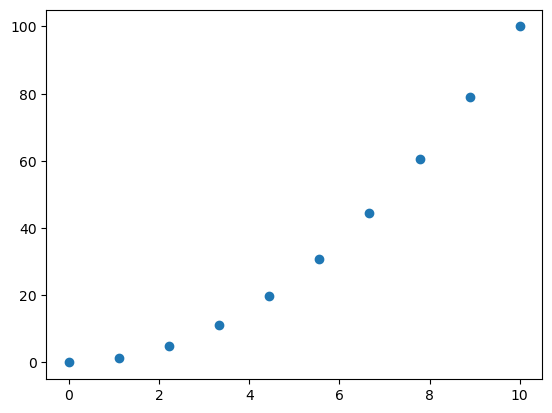

In [10]:
x = np.linspace(0, 10, 10)
y = x ** 2
plt.scatter(x, y)

In [11]:
from scipy.interpolate import interp1d

In [13]:
f = interp1d(x, y, kind='linear')


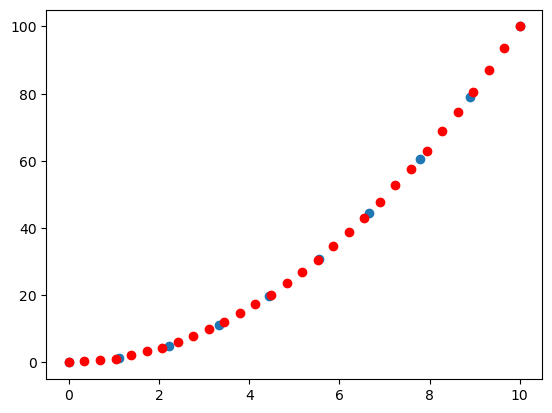

In [19]:
new_x = np.linspace(0, 10, 30)
new_y = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, new_y, c='red')

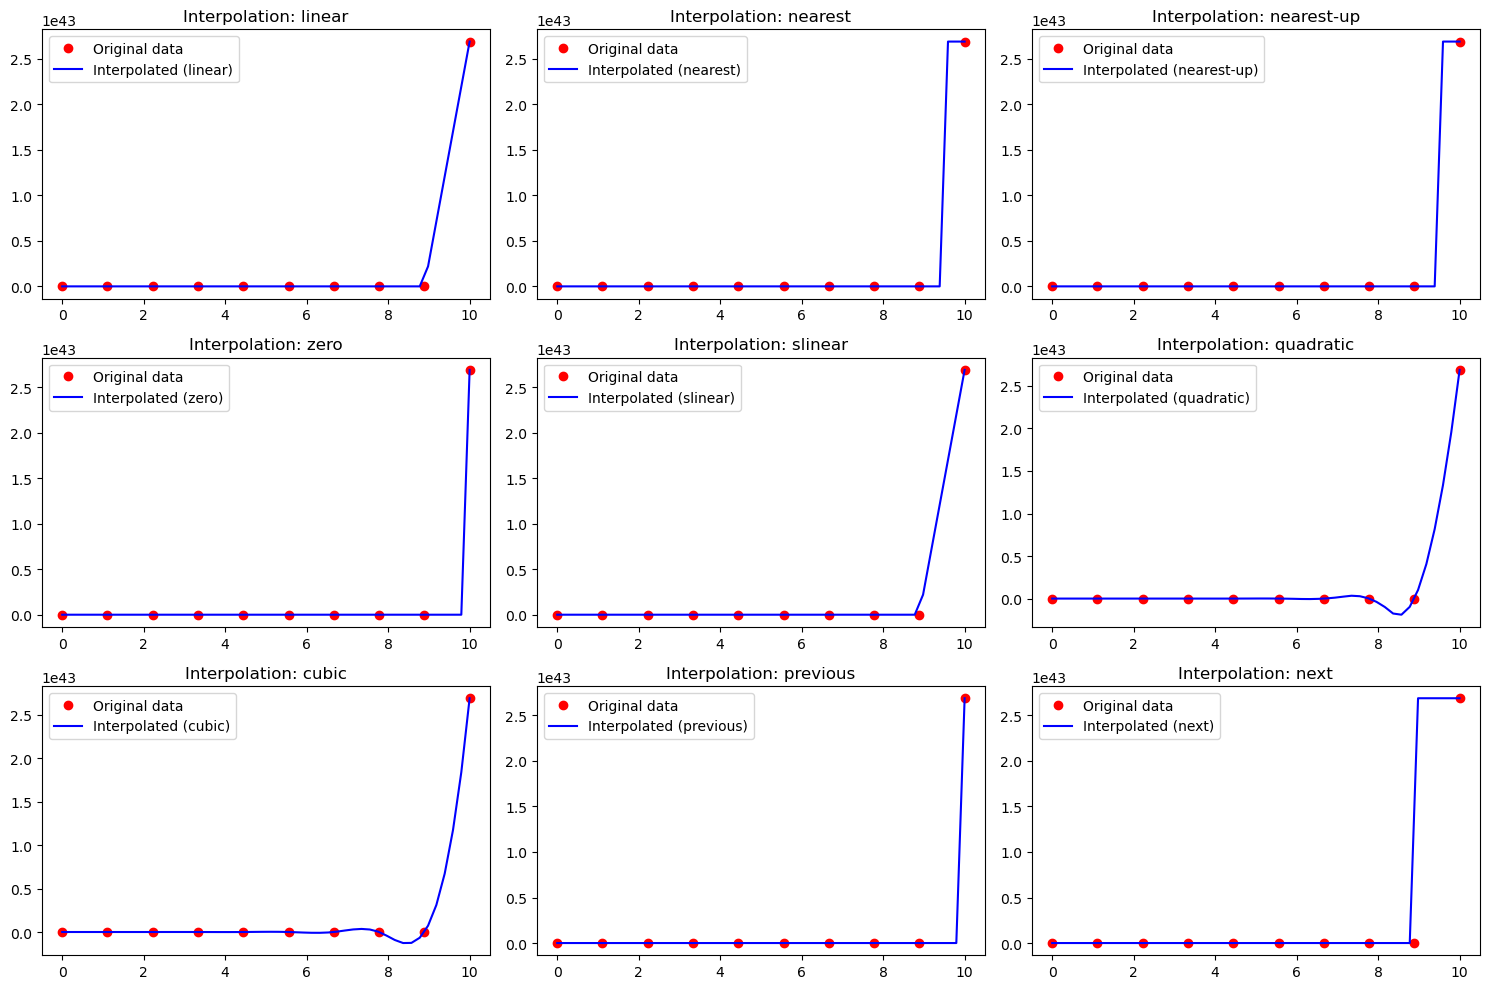

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define data points
x = np.linspace(0, 10, 10)
y = np.exp(x**2)

# Generate dense x values for smooth plotting
x_dense = np.linspace(0, 10, 50)

# Kinds of interpolation
kinds = ['linear', 'nearest', 'nearest-up', 'zero', 'slinear', 
         'quadratic', 'cubic', 'previous', 'next']

# Plotting each interpolation kind
plt.figure(figsize=(15, 10))

for i, kind in enumerate(kinds):
    # Create interpolator
    if kind == 'nearest-up':
        interpolator = interp1d(x, y, kind='nearest', bounds_error=False, fill_value='extrapolate')
    else:
        interpolator = interp1d(x, y, kind=kind, bounds_error=False, fill_value='extrapolate')
    
    # Interpolated y values
    y_dense = interpolator(x_dense)
    
    # Plot original and interpolated data
    plt.subplot(3, 3, i + 1)
    plt.plot(x, y, 'o', label='Original data', color='red')  # Original data points
    plt.plot(x_dense, y_dense, '-', label=f'Interpolated ({kind})', color='blue')
    plt.title(f"Interpolation: {kind}")
    plt.legend()

plt.tight_layout()
plt.show()


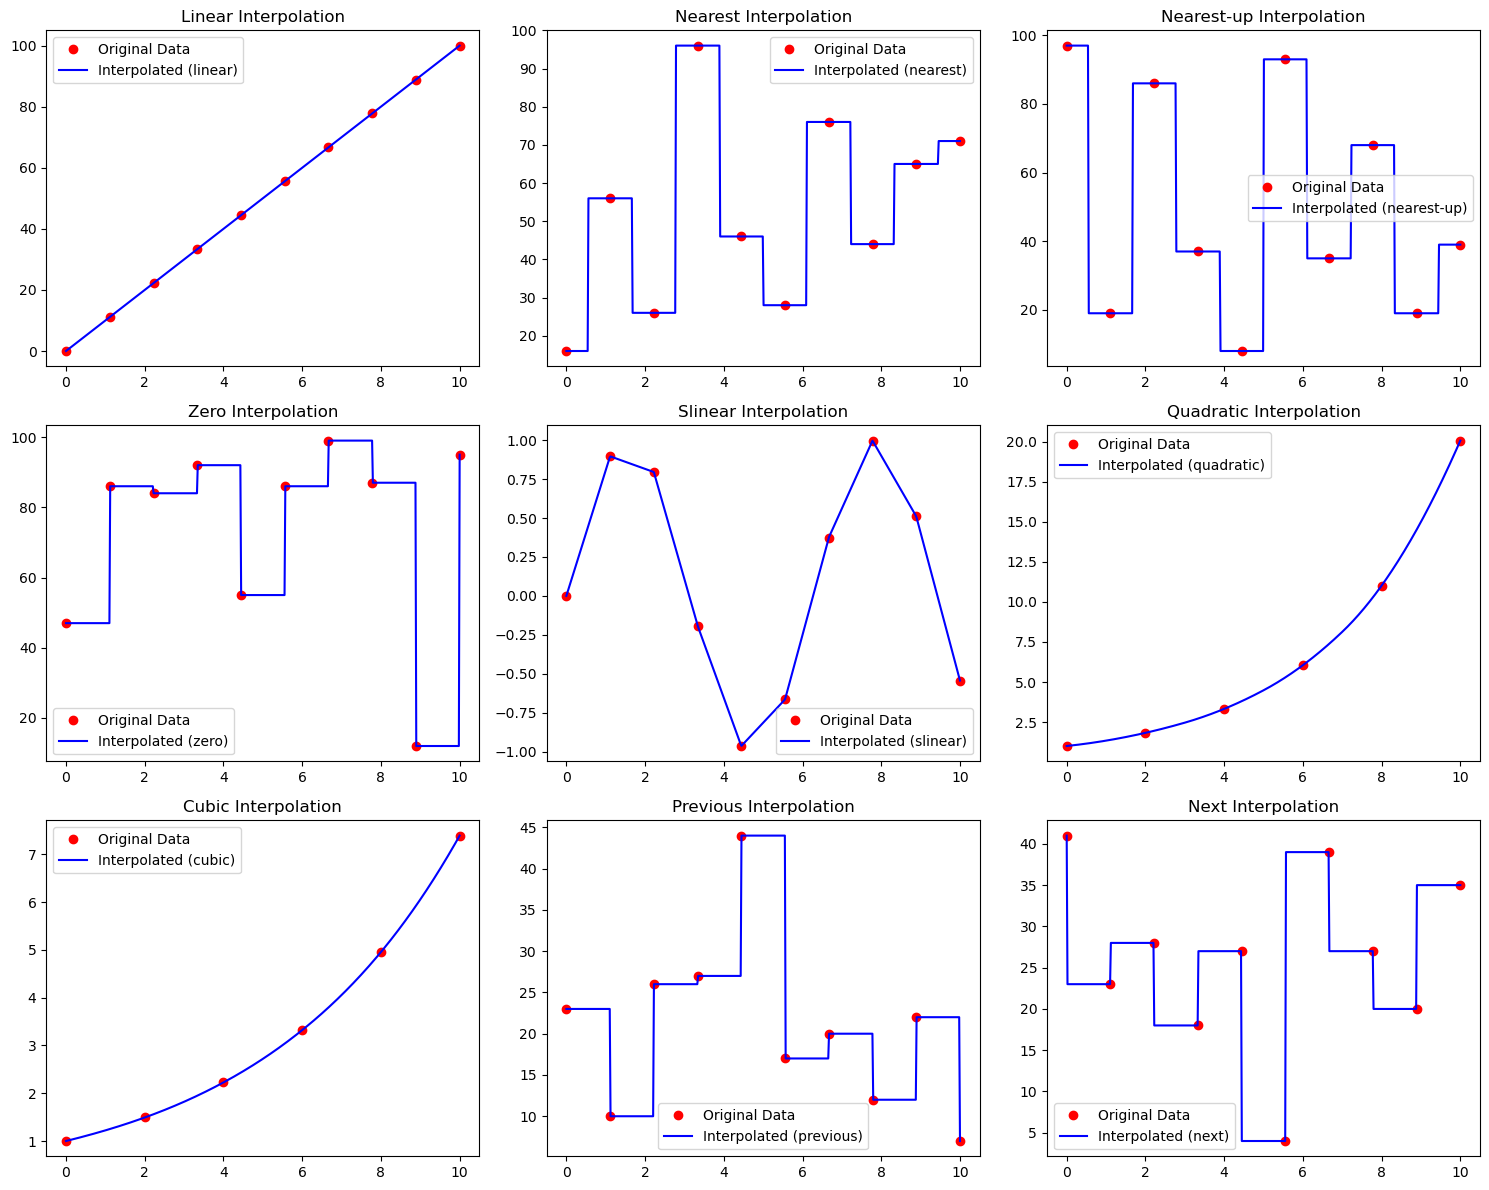

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function definitions for interpolation with different datasets
def demo_interpolations():
    datasets = [
        {
            'name': 'linear',
            'x': np.linspace(0, 10, 10),
            'y': np.linspace(0, 100, 10),
            'kind': 'linear',
        },
        {
            'name': 'nearest',
            'x': np.linspace(0, 10, 10),
            'y': np.random.randint(0, 100, 10),
            'kind': 'nearest',
        },
        {
            'name': 'nearest-up',
            'x': np.linspace(0, 10, 10),
            'y': np.random.randint(0, 100, 10),
            'kind': 'nearest',
        },
        {
            'name': 'zero',
            'x': np.linspace(0, 10, 10),
            'y': np.random.randint(0, 100, 10),
            'kind': 'zero',
        },
        {
            'name': 'slinear',
            'x': np.linspace(0, 10, 10),
            'y': np.sin(np.linspace(0, 10, 10)),
            'kind': 'slinear',
        },
        {
            'name': 'quadratic',
            'x': np.linspace(0, 10, 6),
            'y': np.exp(np.linspace(0, 3, 6)),
            'kind': 'quadratic',
        },
        {
            'name': 'cubic',
            'x': np.linspace(0, 10, 6),
            'y': np.exp(np.linspace(0, 2, 6)),
            'kind': 'cubic',
        },
        {
            'name': 'previous',
            'x': np.linspace(0, 10, 10),
            'y': np.random.randint(0, 50, 10),
            'kind': 'previous',
        },
        {
            'name': 'next',
            'x': np.linspace(0, 10, 10),
            'y': np.random.randint(0, 50, 10),
            'kind': 'next',
        },
    ]
    
    x_dense = np.linspace(0, 10, 500)
    
    # Plot each dataset with its best interpolation method
    plt.figure(figsize=(15, 12))
    for i, data in enumerate(datasets):
        interpolator = interp1d(data['x'], data['y'], kind=data['kind'], bounds_error=False, fill_value='extrapolate')
        y_dense = interpolator(x_dense)
        
        plt.subplot(3, 3, i + 1)
        plt.plot(data['x'], data['y'], 'o', label='Original Data', color='red')
        plt.plot(x_dense, y_dense, '-', label=f"Interpolated ({data['name']})", color='blue')
        plt.title(f"{data['name'].capitalize()} Interpolation")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Run the demo
demo_interpolations()


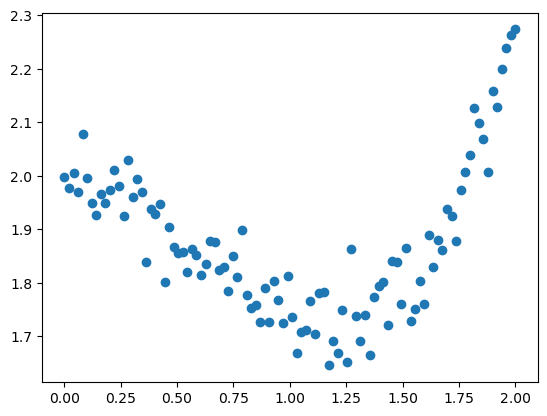

In [49]:
import random
random.seed(42)
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [50]:
def f(x, a, b, c, d):
    return a* x**3 + b* x**2 + c*x + d

In [51]:
from scipy import optimize

In [52]:
params, param_corvs = optimize.curve_fit(f, x, y)

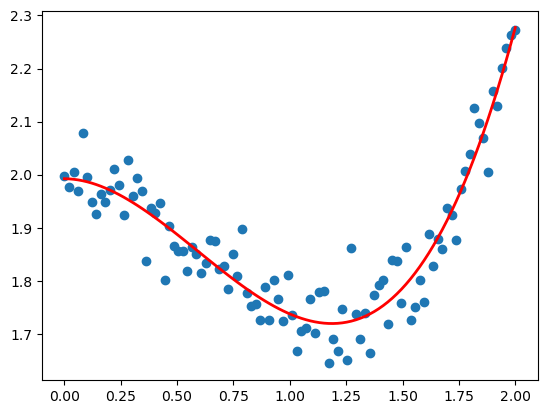

In [53]:
plt.scatter(x, y)
plt.plot(x, f(x, *params), c='r', lw=2)

Paramètres optimisés: [3.18041252 1.44714793]
Matrice de covariance: [[0.09779483 0.04431764]
 [0.04431764 0.0454979 ]]
Erreurs standard des paramètres: [0.31272165 0.21330238]


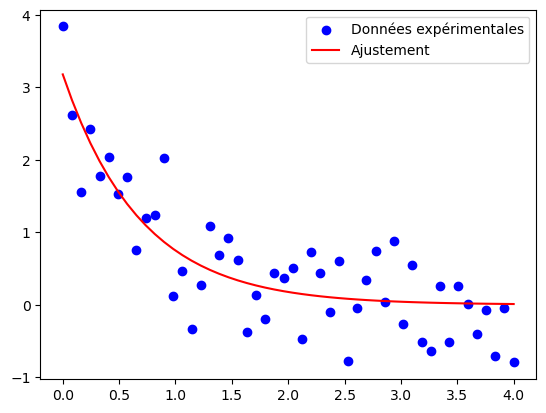

In [54]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Données expérimentales
x = np.linspace(0, 4, 50)
y = 3 * np.exp(-1.5 * x) + 0.5 * np.random.normal(size=len(x))  # Données avec bruit

# Fonction à ajuster
def f(x, a, b):
    return a * np.exp(-b * x)

# Ajustement des données
params, params_cov = curve_fit(f, x, y)

# Afficher les paramètres optimisés
print("Paramètres optimisés:", params)
print("Matrice de covariance:", params_cov)

# Calculer les erreurs sur les paramètres
param_errors = np.sqrt(np.diag(params_cov))
print("Erreurs standard des paramètres:", param_errors)

# Prédire les valeurs ajustées
y_fit = f(x, *params)

# Visualisation
plt.scatter(x, y, label="Données expérimentales", color="blue")
plt.plot(x, y_fit, label="Ajustement", color="red")
plt.legend()
plt.show()


In [55]:
def f(x):
    return x**2 + 15*np.sin(x)

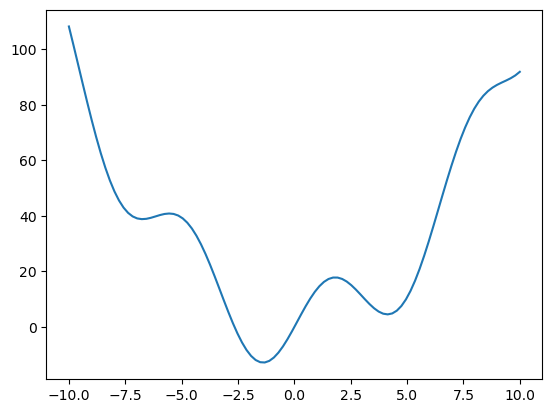

In [56]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [76]:
x0 = -5
t = optimize.minimize(f, x0=x0).x
print(t)

[-1.38505583]


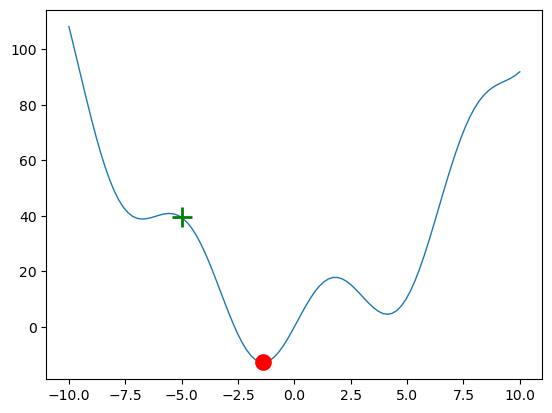

In [77]:
plt.plot(x, f(x), lw=1, zorder=1)
plt.scatter(t, f(t), c='r', lw=2, s=100, zorder=2)
plt.scatter(x0, f(x0), c='g', lw=2, s=200, marker='+', zorder=7)
plt.show()

In [85]:
import numpy as np 
import matplotlib.pyplot as plt
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1]) * np.cos(x[0])

[0. 0.]
[-0.78539917 -2.35619343]


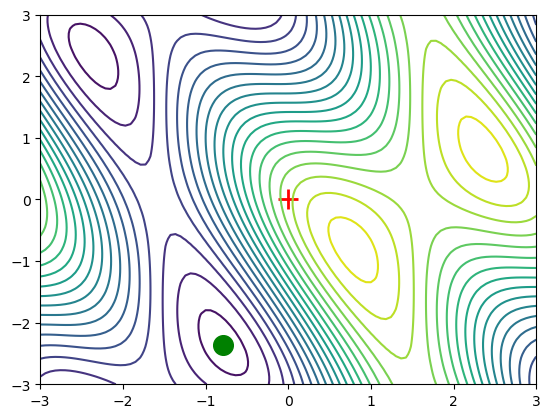

In [105]:
from scipy.optimize import minimize
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y  = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

x0 = np.zeros(2)
print(x0)
plt.scatter(x0[0], x0[1], marker='+', c='r', lw=2, s=200)

t = minimize(f, x0=x0).x
print(t)

plt.scatter(t[0], t[1], c='green', marker='o', s=200, lw=1)

# 3) Traitement du signal

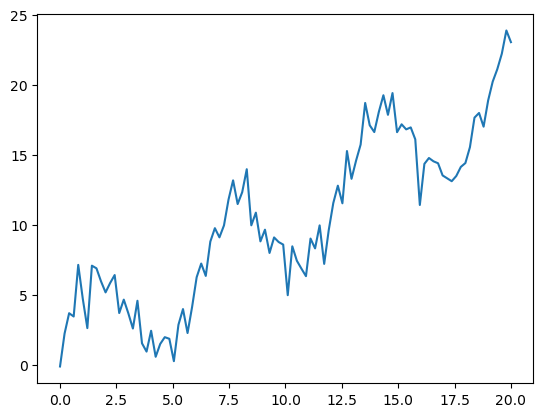

In [108]:
x = np.linspace(0, 20, 100)
y = x + 4 * np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [109]:
from scipy import signal

In [112]:
new_y = signal.detrend(y)

<function matplotlib.pyplot.show(close=None, block=None)>

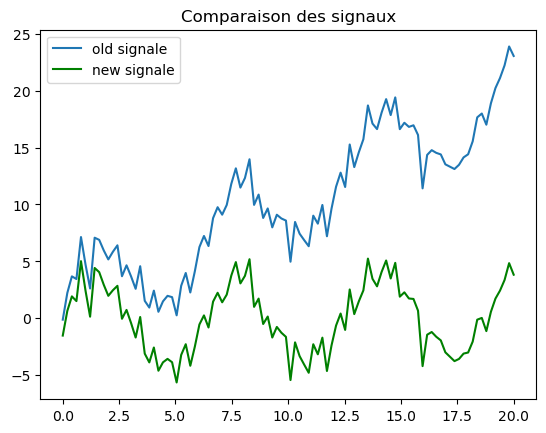

In [121]:
plt.plot(x, y, label='old signale')
plt.plot(x, new_y, label='new signale', c='green')
plt.legend()
plt.title("Comparaison des signaux")
plt.show

# Transformation de Fourier

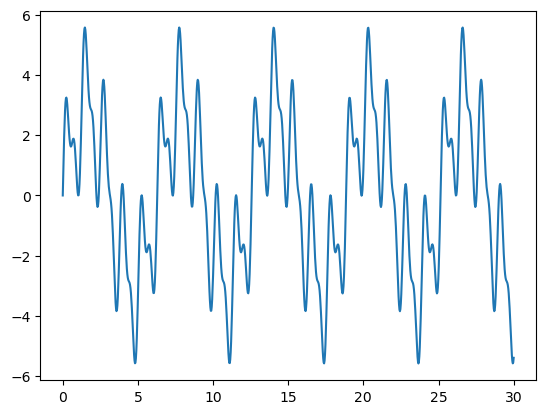

In [122]:
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [123]:
from scipy import fftpack

c:\Users\bilal\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bilal\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


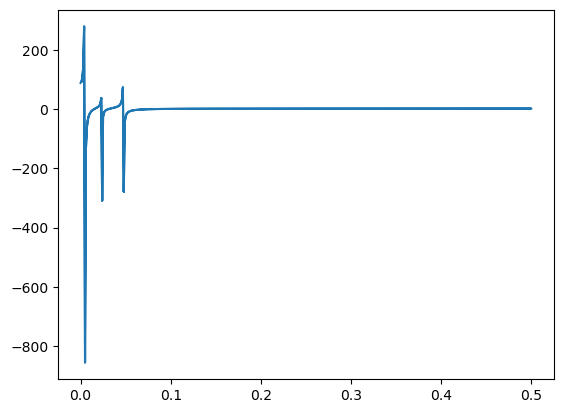

In [127]:
foruier = fftpack.fft(y)
power = np.abs(foruier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), foruier)

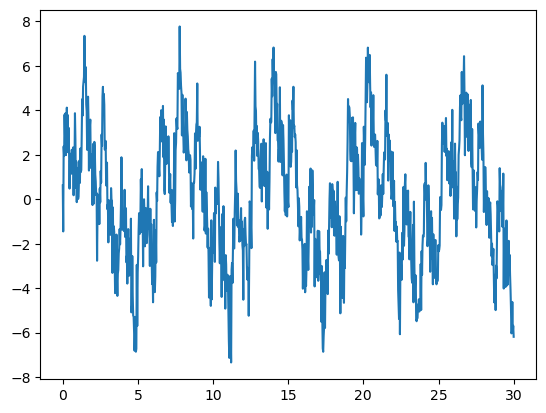

In [137]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [147]:
from scipy import fftpack

1000
1342.1068371876224


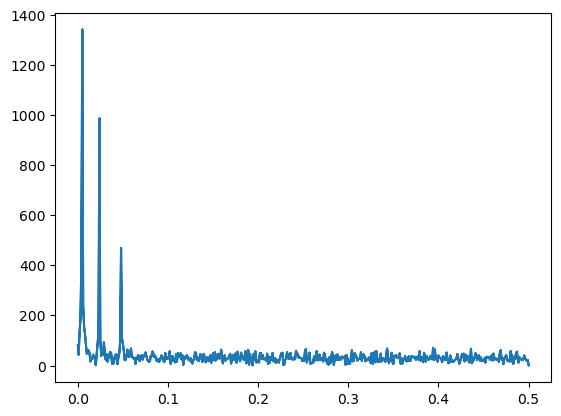

In [163]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
print(y.size)
plt.plot(np.abs(frequences), power)
print(max(power))


In [164]:
fourier[power < 100] = 0

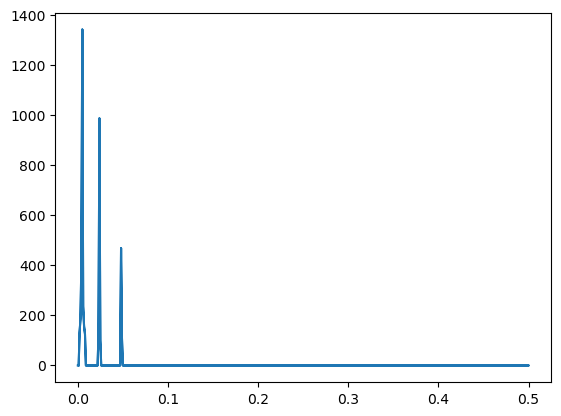

In [165]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [166]:
singal_filer =  fftpack.ifft(fourier)

c:\Users\bilal\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bilal\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


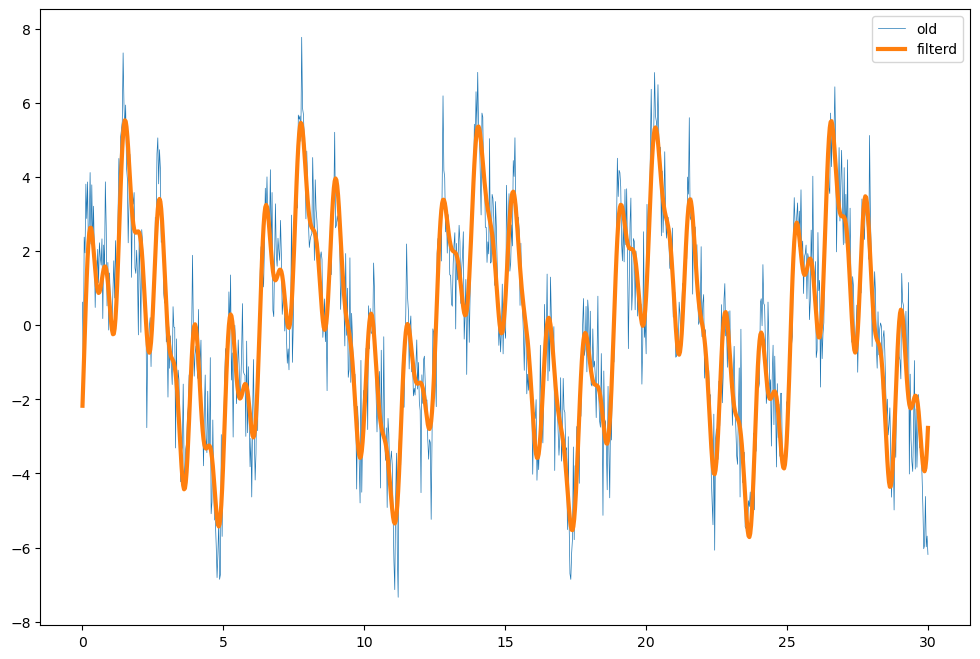

In [169]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='old')
plt.plot(x, singal_filer, lw=3, label='filterd')
plt.legend()
plt.show()

In [170]:
from scipy import ndimage

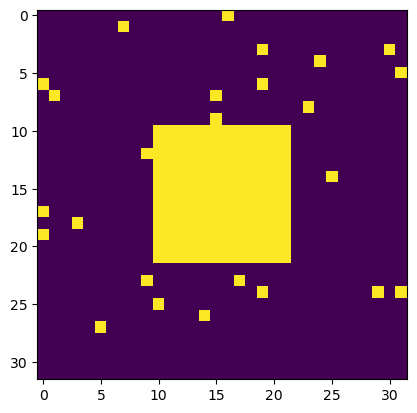

In [185]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

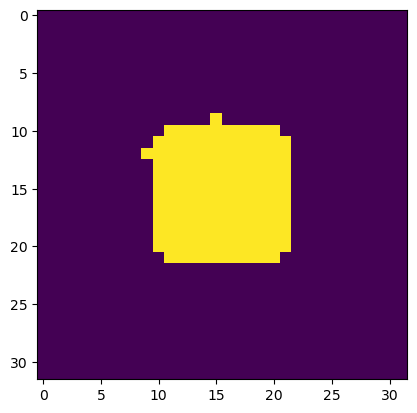

In [187]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(507, 537)

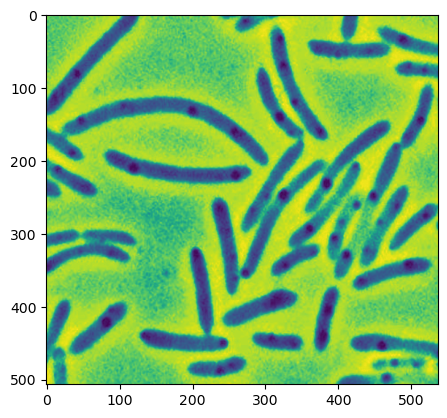

In [193]:
image = plt.imread('bacteria.png')
image = image[:,:,0]
plt.imshow(image)
image.shape

(array([3.000e+00, 7.000e+00, 1.500e+01, 3.500e+01, 0.000e+00, 6.500e+01,
        1.030e+02, 1.030e+02, 1.120e+02, 0.000e+00, 1.610e+02, 1.460e+02,
        1.370e+02, 1.450e+02, 0.000e+00, 1.410e+02, 1.660e+02, 1.350e+02,
        0.000e+00, 1.340e+02, 1.590e+02, 1.330e+02, 1.580e+02, 0.000e+00,
        1.590e+02, 1.420e+02, 1.680e+02, 2.000e+02, 0.000e+00, 2.330e+02,
        2.370e+02, 2.350e+02, 2.990e+02, 0.000e+00, 3.240e+02, 3.640e+02,
        3.600e+02, 0.000e+00, 4.430e+02, 4.460e+02, 4.580e+02, 4.540e+02,
        0.000e+00, 4.880e+02, 5.620e+02, 5.530e+02, 5.190e+02, 0.000e+00,
        5.930e+02, 6.360e+02, 6.310e+02, 0.000e+00, 7.320e+02, 7.310e+02,
        8.210e+02, 8.400e+02, 0.000e+00, 9.270e+02, 9.620e+02, 1.010e+03,
        1.092e+03, 0.000e+00, 1.105e+03, 1.120e+03, 1.091e+03, 1.153e+03,
        0.000e+00, 1.252e+03, 1.362e+03, 1.349e+03, 0.000e+00, 1.354e+03,
        1.335e+03, 1.316e+03, 1.308e+03, 0.000e+00, 1.163e+03, 1.153e+03,
        1.076e+03, 1.044e+03, 0.000e+0

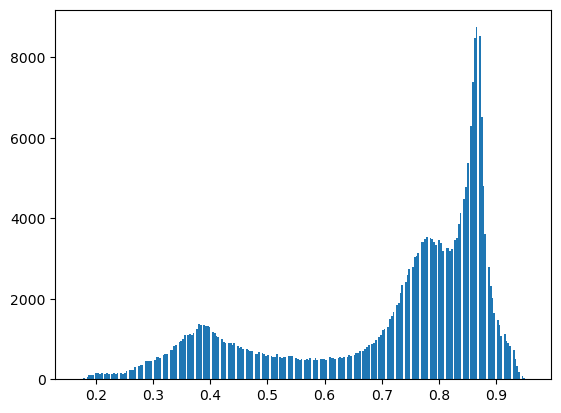

In [197]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)

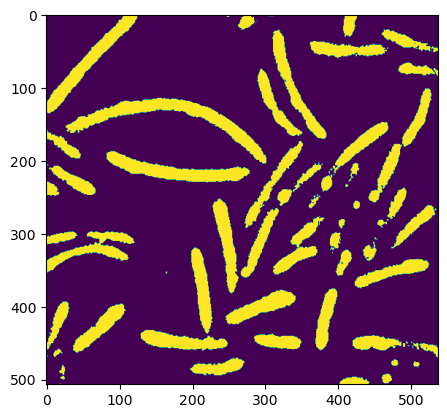

In [200]:
image = image < 0.6
plt.imshow(image)

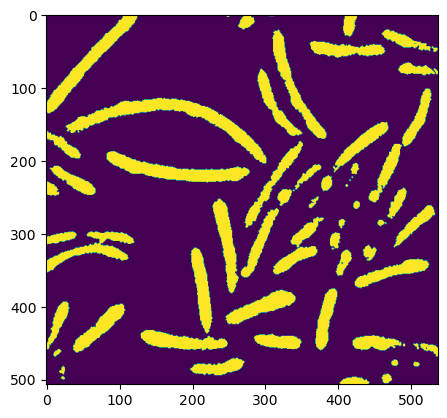

In [202]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [204]:
label_image, n_labels = ndimage.label(image)
print(n_labels)

94


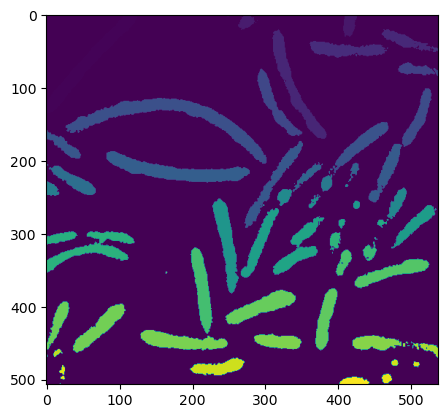

In [205]:
plt.imshow(label_image)

In [208]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))
sizes

array([   0., 2931.,   23.,    0.,    0.,   26.,  442.,  298.,    0.,
          0., 2277.,  779., 1466.,   37.,    0.,    0.,    0.,    0.,
        542.,   27., 1380.,    0., 1112., 4877., 1357.,  640., 1576.,
       1126., 3347.,    0.,  128.,  362.,    0.,    0.,  950.,    0.,
          0.,    0.,  248.,    5.,  251.,    0.,    0.,   12.,  512.,
        300.,    0.,   93.,    0., 2025.,   80.,    0.,  935., 1333.,
          0., 1661.,   79.,    0.,   66.,  459., 2120.,  246.,    0.,
          0.,  255.,    0., 1795.,  416.,    0., 1548.,    0., 1324.,
       1890.,  761., 1554., 1943.,  998.,  985.,    0.,    0.,    0.,
         11.,  263.,    0.,    0.,   66.,    0., 1039.,   66.,   44.,
         56.,  139.,   19.,  306.])

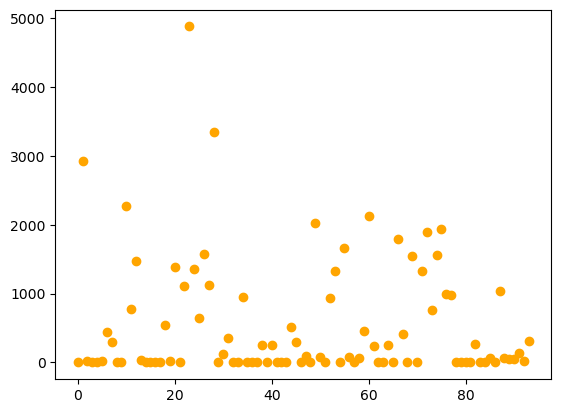

In [207]:
plt.scatter(range(n_labels), sizes, c='orange')